In [1]:
import pandas_datareader

In [2]:
googl = pandas_datareader.get_data_yahoo('GOOGL')

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-16,510.850006,503.089996,503.149994,510.459991,2482900,510.459991
2015-01-20,515.609985,509.369995,512.770020,509.940002,2339800,509.940002
2015-01-21,521.849976,509.589996,510.839996,520.390015,2317800,520.390015
2015-01-22,538.840027,521.909973,523.000000,537.299988,2803400,537.299988
2015-01-23,545.409973,535.750000,538.030029,541.950012,2298300,541.950012


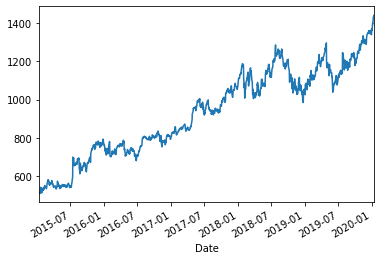

In [5]:
googl['Close'].plot(kind = 'line')

In [6]:
googl.count()

High         1258
Low          1258
Open         1258
Close        1258
Volume       1258
Adj Close    1258
dtype: int64

In [7]:
googl.to_csv('google_stock_price.csv')

# 读取Google 数据

In [77]:
import pandas

googl = pandas.read_csv('google_stock_price.csv')
googl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-16,510.850006,503.089996,503.149994,510.459991,2482900,510.459991
1,2015-01-20,515.609985,509.369995,512.770020,509.940002,2339800,509.940002
2,2015-01-21,521.849976,509.589996,510.839996,520.390015,2317800,520.390015
3,2015-01-22,538.840027,521.909973,523.000000,537.299988,2803400,537.299988
4,2015-01-23,545.409973,535.750000,538.030029,541.950012,2298300,541.950012


# 将数据分成训练与测试数据集

In [9]:
googl.count()

Date         1258
High         1258
Low          1258
Open         1258
Close        1258
Volume       1258
Adj Close    1258
dtype: int64

In [10]:
training_set = googl.iloc[0:1258 - 200, 4:5].values

In [11]:
training_set[0:3]

array([[510.45999146],
       [509.94000244],
       [520.39001465]])

In [12]:
#training_set.shape

In [13]:
test_set = googl.iloc[1258 - 200:, 4:5].values

In [14]:
test_set[0:3]

array([[1205.54003906],
       [1210.81005859],
       [1219.44995117]])

# 数据标准化

In [15]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
training_set_scaled

array([[6.70469100e-04],
       [0.00000000e+00],
       [1.34741506e-02],
       ...,
       [8.54002294e-01],
       [8.59959274e-01],
       [8.88441875e-01]])

In [17]:
#len(training_set_scaled)

In [18]:
import numpy as np

x_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(998, 60)

In [20]:
y_train.shape

(998,)

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape

(998, 60, 1)

# 建构LSTM 神经网络

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [24]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

## 数字预测比较常用 mean_squared_error
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [25]:
regressor.fit(x_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
998/998 [==============================] - 5s 5ms/step - loss: 0.1186
Epoch 2/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0452
Epoch 3/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0195
Epoch 4/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0109
Epoch 5/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0067
Epoch 6/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 7/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 8/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 9/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 10/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 11/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 12/50
998/998 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 13/50
998/998 [====

# 评估模型在测试数据集的表现

In [26]:
test_set.shape

(200, 1)

In [27]:
test_set = sc.transform(test_set)

In [28]:
test_set[0:3]

array([[0.89690035],
       [0.90369547],
       [0.91483567]])

In [29]:
x_test = []
for i in range(60, len(test_set)):
    x_test.append(test_set[i-60:i, 0])

In [30]:
x_test = np.array(x_test)

In [31]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
x_test.shape

(140, 60, 1)

In [33]:
predicted_stock_price = regressor.predict(x_test)

In [34]:
predicted_stock_price[0:3]

array([[0.7351169 ],
       [0.73838276],
       [0.74102503]], dtype=float32)

In [35]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
predicted_stock_price[0:3]

array([[1080.0673],
       [1082.6001],
       [1084.6494]], dtype=float32)

In [37]:
test_set[0:3]

array([[0.89690035],
       [0.90369547],
       [0.91483567]])

In [38]:
real_stock_price = sc.inverse_transform(test_set[60:])

In [39]:
real_stock_price[0:3]

array([[1076.63000488],
       [1082.80004883],
       [1100.        ]])

In [40]:
len(real_stock_price)

140

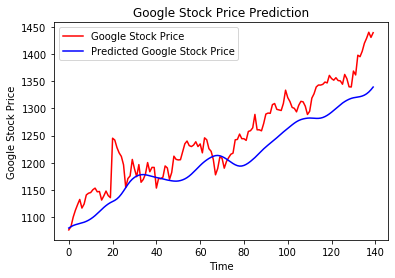

In [52]:
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color = 'red', label = 'Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

# 评估模型在训练数据集的表现

In [42]:
predicted_stock_price2 = regressor.predict(x_train)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
real_stock_price2 = training_set[60:]

In [43]:
len(predicted_stock_price2)

998

In [44]:
len(real_stock_price2)

998

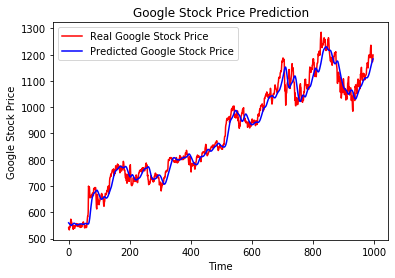

In [48]:
import matplotlib.pyplot as plt

plt.plot(real_stock_price2, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 测试

In [81]:
z_test = np.random.random([1, 60, 1])
z_test

array([[[0.90055142],
        [0.18786042],
        [0.47792614],
        [0.34695119],
        [0.00557047],
        [0.45931817],
        [0.81101603],
        [0.42418692],
        [0.00307817],
        [0.95949689],
        [0.14963999],
        [0.12459961],
        [0.968146  ],
        [0.65723799],
        [0.28779143],
        [0.96557797],
        [0.39014313],
        [0.90608184],
        [0.52592013],
        [0.2126402 ],
        [0.85082736],
        [0.89974428],
        [0.65340795],
        [0.04486986],
        [0.55503744],
        [0.75042575],
        [0.43941701],
        [0.8141084 ],
        [0.6779216 ],
        [0.83151013],
        [0.94527427],
        [0.15163361],
        [0.40410434],
        [0.03544651],
        [0.6552654 ],
        [0.15834976],
        [0.91113399],
        [0.48630956],
        [0.00821793],
        [0.38256084],
        [0.21041611],
        [0.06772285],
        [0.57643841],
        [0.71094891],
        [0.31073774],
        [0

In [82]:
predicted_test = regressor.predict(z_test)

In [75]:
predicted_test = sc.inverse_transform(predicted_test)
predicted_test

array([[857.8745]], dtype=float32)

In [85]:
test = sc.inverse_transform([0.8, 1, 1])
test

ValueError: Expected 2D array, got 1D array instead:
array=[0.8 1.  1. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.